In [10]:
import os

# Define the path to the directory containing your dataset
input_directory = r"C:\Users\iamak\OneDrive\Documents\GCET\IPBL\capstone-5\Capstone-V-Leaukemia Detection"

# Define the subdirectories (train, test, validate)
subdirectories = ["train", "test", "valid"]

# Loop through each subdirectory
for subdir in subdirectories:
    images_dir = os.path.join(input_directory, subdir, "images")  # Access the 'images' subdirectory
    labels_dir = os.path.join(input_directory, subdir, "labels")  # Access the 'labels' subdirectory
    
    # Check if both images and labels directories exist
    if os.path.exists(images_dir) and os.path.exists(labels_dir):
        # Count the number of image files in the images directory
        num_images = len([file for file in os.listdir(images_dir) if file.endswith('.jpg')])
        
        # Count the number of label files in the labels directory
        num_labels = len([file for file in os.listdir(labels_dir) if file.endswith('.txt')])
        
        # Print the counts
        print(f"Number of images in {subdir}: {num_images}")
        print(f"Number of labels in {subdir}: {num_labels}")
    else:
        print(f"Directory not found for {subdir}.")


Number of images in train: 6590
Number of labels in train: 6590
Number of images in test: 312
Number of labels in test: 312
Number of images in valid: 622
Number of labels in valid: 622


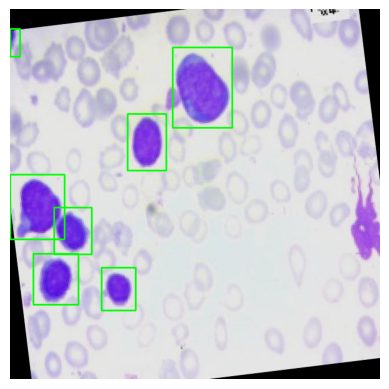

In [14]:
import cv2
import matplotlib.pyplot as plt

# Load the sample image
image_path = r"C:\Users\iamak\OneDrive\Documents\GCET\IPBL\capstone-5\Capstone-V-Leaukemia Detection\train\images\WBC-Benign-001_jpg.rf.35672fd45ba8848c782cf173cdfe0f55.jpg"
image = cv2.imread(image_path)

# Read the bounding box annotations from the text file
annotation_path = r"C:\Users\iamak\OneDrive\Documents\GCET\IPBL\capstone-5\Capstone-V-Leaukemia Detection\train\labels\WBC-Benign-001_jpg.rf.35672fd45ba8848c782cf173cdfe0f55.txt"

# Read bounding box annotations
annotations = []
with open(annotation_path, 'r') as file:
    for line in file:
        parts = line.strip().split(' ')
        annotations.append((int(parts[0]), float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4])))

# Draw bounding boxes on the image
for bbox in annotations:
    class_id, x_center, y_center, width, height = bbox
    x_min = int((x_center - width / 2) * image.shape[1])
    y_min = int((y_center - height / 2) * image.shape[0])
    x_max = int((x_center + width / 2) * image.shape[1])
    y_max = int((y_center + height / 2) * image.shape[0])
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

# Display the annotated image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


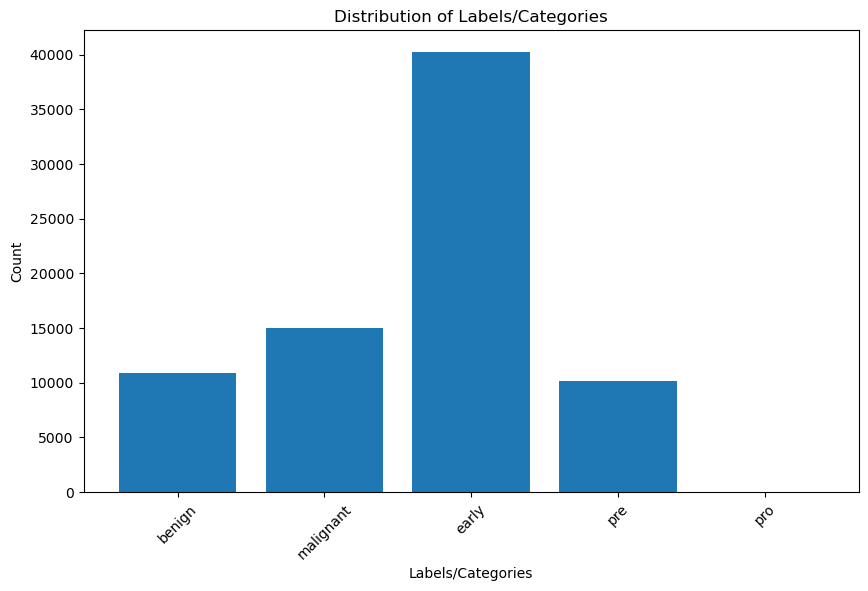

In [19]:
import os

# Example labels/categories
labels = ["benign", "malignant", "early", "pre", "pro"]

# Count occurrences of each label
label_counts = {label: 0 for label in labels}

# Define the path to the directory containing your dataset
dataset_dir = r"C:\Users\iamak\OneDrive\Documents\GCET\IPBL\capstone-5\Capstone-V-Leaukemia Detection"

# Define the subdirectories (train, test, validate)
subdirectories = ["train", "test", "validate"]

# Loop through each subdirectory
for subdir in subdirectories:
    # Access the 'labels' subdirectory
    labels_dir = os.path.join(dataset_dir, subdir, "labels")
    
    # Check if the 'labels' subdirectory exists
    if os.path.exists(labels_dir):
        # Loop through each file in the 'labels' directory
        for filename in os.listdir(labels_dir):
            # Read bounding box annotations from the text file
            with open(os.path.join(labels_dir, filename), 'r') as file:
                for line in file:
                    parts = line.strip().split(' ')
                    label = labels[int(parts[0])]  # Convert class_id to label
                    label_counts[label] += 1

# Plot histogram or bar chart
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.show()


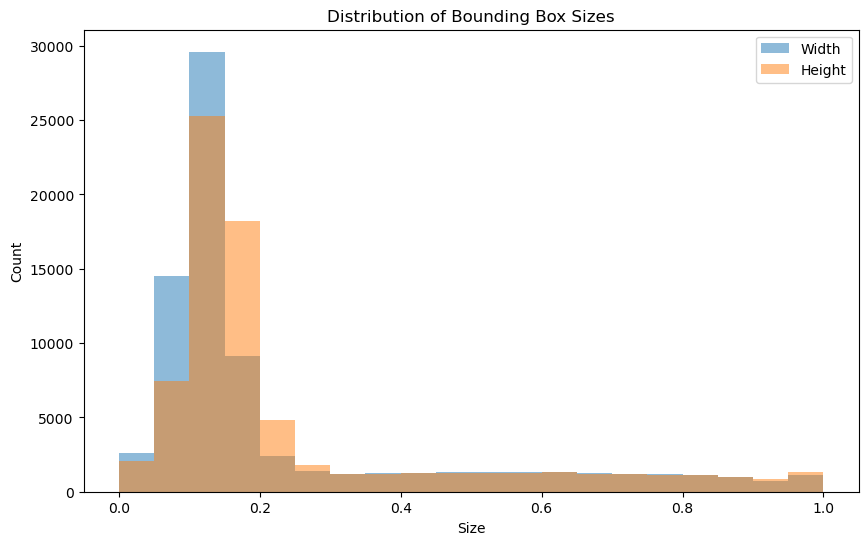

In [21]:
import os
import matplotlib.pyplot as plt

# Define the path to the directory containing your dataset
dataset_dir = r"C:\Users\iamak\OneDrive\Documents\GCET\IPBL\capstone-5\Capstone-V-Leaukemia Detection"

# Define the subdirectories (train, test, validate)
subdirectories = ["train", "test", "validate"]

# Initialize lists to store bounding box sizes
bbox_widths = []
bbox_heights = []

# Loop through each subdirectory
for subdir in subdirectories:
    # Access the 'labels' subdirectory
    labels_dir = os.path.join(dataset_dir, subdir, "labels")
    
    # Check if the 'labels' subdirectory exists
    if os.path.exists(labels_dir):
        # Loop through each file in the 'labels' directory
        for filename in os.listdir(labels_dir):
            # Read bounding box annotations from the text file
            with open(os.path.join(labels_dir, filename), 'r') as file:
                for line in file:
                    parts = line.strip().split(' ')
                    width = float(parts[3])
                    height = float(parts[4])
                    bbox_widths.append(width)
                    bbox_heights.append(height)

# Plot histogram or scatter plot
plt.figure(figsize=(10, 6))
plt.hist(bbox_widths, bins=20, alpha=0.5, label='Width')
plt.hist(bbox_heights, bins=20, alpha=0.5, label='Height')
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Distribution of Bounding Box Sizes')
plt.legend()
plt.show()


In [24]:
import os
import cv2
import numpy as np
from random import randint

# Define the path to the directory containing your dataset
dataset_dir = r"C:\Users\iamak\OneDrive\Documents\GCET\IPBL\capstone-5\Capstone-V-Leaukemia Detection"

# Define the subdirectories (train, test, validate)
subdirectories = ["train", "test", "valid"]

# Define image size after resizing
target_size = (224, 224)  # Example size, adjust as needed

# Define augmentation parameters
rotation_range = 20  # Example rotation range in degrees
brightness_range = (0.8, 1.2)  # Example brightness range

# Loop through each subdirectory
for subdir in subdirectories:
    images_dir = os.path.join(dataset_dir, subdir, "images")
    
    # Loop through each image in the directory
    for filename in os.listdir(images_dir):
        image_path = os.path.join(images_dir, filename)
        
        # Load the image
        image = cv2.imread(image_path)
        
        # Check if the image is valid
        if image is not None:
            # Resize the image
            resized_image = cv2.resize(image, target_size)
            
            # Apply data augmentation
            # Horizontal flipping
            if randint(0, 1) == 1:
                resized_image = cv2.flip(resized_image, 1)
            
            # Vertical flipping
            if randint(0, 1) == 1:
                resized_image = cv2.flip(resized_image, 0)
            
            # Random rotation
            rotation_angle = randint(-rotation_range, rotation_range)
            rotation_matrix = cv2.getRotationMatrix2D((target_size[0] / 2, target_size[1] / 2), rotation_angle, 1)
            rotated_image = cv2.warpAffine(resized_image, rotation_matrix, target_size)
            
            # Random brightness adjustment
            brightness_factor = np.random.uniform(brightness_range[0], brightness_range[1])
            augmented_image = np.clip(rotated_image * brightness_factor, 0, 255).astype(np.uint8)
            
            # Apply Gaussian blur
            augmented_image = cv2.GaussianBlur(augmented_image, (5, 5), 0)
            
            # Save the augmented image
            cv2.imwrite(os.path.join(images_dir, filename), augmented_image)


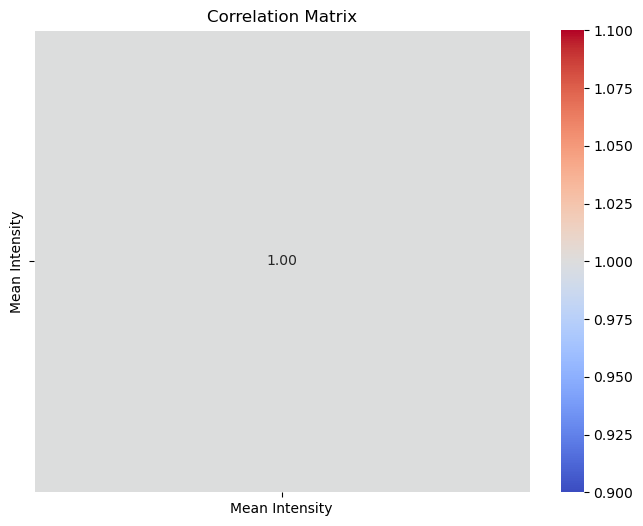

In [34]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the directory containing your dataset
dataset_dir = r"C:\Users\iamak\OneDrive\Documents\GCET\IPBL\capstone-5\Capstone-V-Leaukemia Detection"

# Define the subdirectories (train, test, validate)
subdirectories = ["train", "test", "valid"]

# Define a list to store features for all leukemia samples
all_features = []

# Loop through each subdirectory
for subdir in subdirectories:
    images_dir = os.path.join(dataset_dir, subdir, "images")
    
    # Initialize a list to store features for leukemia samples in the current subdirectory
    features = []
    
    # Loop through each image in the directory
    for filename in os.listdir(images_dir):
        # Read the image
        image = cv2.imread(os.path.join(images_dir, filename))
        
        # Extract features (e.g., mean pixel intensity)
        # For illustration purposes, let's calculate mean pixel intensity as a feature
        mean_intensity = np.mean(image)
        
        # Append features to the list for the current subdirectory
        features.append(mean_intensity)
    
    # Extend the list of features for all leukemia samples with features from the current subdirectory
    all_features.extend(features)

# Create a pandas DataFrame from the list of features
data = pd.DataFrame({"Mean Intensity": all_features})

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
